__Imports__

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

__Dataset__

In [2]:
digits = tf.keras.datasets.mnist.load_data(path='mnist.npz')
(x_train_full,y_train_full),(x_test,y_test) = digits

In [3]:
x_train_full.shape

(60000, 28, 28)

In [4]:
x_valid,x_train = x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test / 255.

In [5]:
x_test.shape

(10000, 28, 28)

__Clear the Backend__

In [6]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

__Model Creation__

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation='tanh'))
model.add(keras.layers.Dense(units=84, activation='tanh'))
model.add(keras.layers.Dense(units=10, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

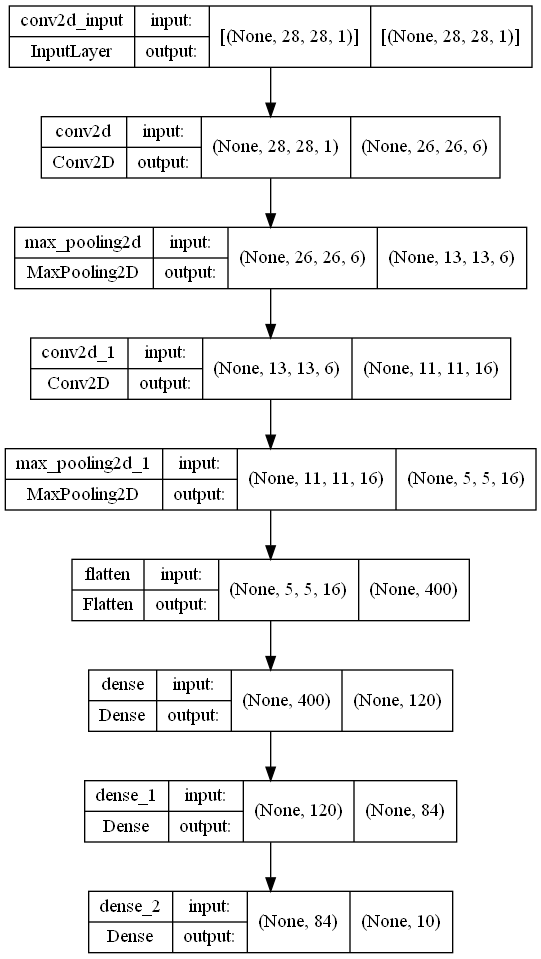

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)

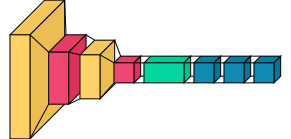

In [10]:
import visualkeras
visualkeras.layered_view(model)

__Model Compile__

In [11]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

__Model Fitting__

In [ ]:
history = model.fit(x_train,y_train,epochs=25,validation_data=(x_valid,y_valid))

Epoch 1/25
1719/1719 [==============================] - 12s 2ms/step - loss: 0.1914 - accuracy: 0.9436 - val_loss: 0.0827 - val_accuracy: 0.9770
Epoch 2/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0570 - val_accuracy: 0.9850
Epoch 3/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0577 - val_accuracy: 0.9842
Epoch 4/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0586 - val_accuracy: 0.9834
Epoch 5/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0564 - val_accuracy: 0.9840
Epoch 6/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0216 - accuracy: 0.9931 - val_loss: 0.0512 - val_accuracy: 0.9878
Epoch 7/25
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0516 - val_accuracy

In [13]:
mse_test = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0648 - accuracy: 0.9875


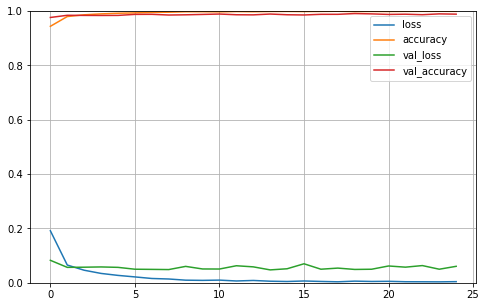

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

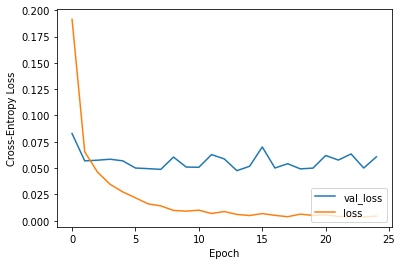

In [21]:
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='lower right')

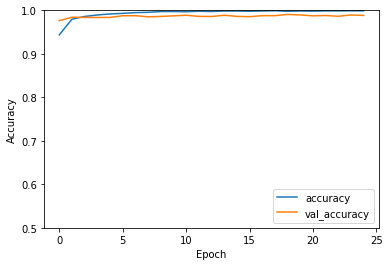

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
import sklearn.metrics as sk
hl = sk.hamming_loss(y_test, y_pred)
js = sk.jaccard_score(y_test, y_pred,average=None)
bss = sk.balanced_accuracy_score(y_test,y_pred)
mcc = sk.matthews_corrcoef(y_test,y_pred)
print("Hamming Loss: "+ str(hl))
print("Jaccard index \n"+ "0\t" + str(js[0]) +"\n" +  "1\t" + str(js[1]) + "\n" + "2\t" + str(js[2])+"\n" + "3\t" + str(js[2]) + 
     "\n"+"4\t"+str(js[3]) + "\n"+"5\t"+str(js[4]) +"\n"+"6\t"+str(js[5]) + "\n"+"7\t"+str(js[6]) + "\n"+"8\t"+str(js[7])
     + "\n"+"9\t"+str(js[8]))
print("Balanced Accuracy Score: " + str(bss))
print("Matthews Correlation Coefficient: "+ str(mcc))

Hamming Loss: 0.0125
Jaccard index 
0	0.9789368104312939
1	0.9877622377622378
2	0.9769452449567724
3	0.9769452449567724
4	0.9794319294809011
5	0.9736575481256332
6	0.9756367663344407
7	0.9721362229102167
8	0.9694947569113441
9	0.9765545361875637
Balanced Accuracy Score: 0.9873674200255698
Matthews Correlation Coefficient: 0.9861096183675815


In [19]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")